In [1]:
import floatingPointSim as fps
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as spstats
from FixedPoint import FXfamily, FXnum

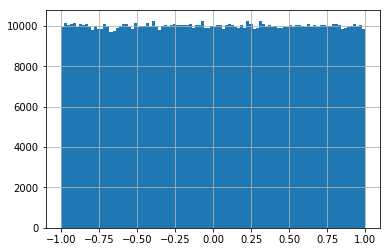

In [2]:
A = np.random.rand(1000000)*2-1
plt.hist(A, 100)
plt.grid(True)

In [3]:
rnd = np.vectorize(fps.roundToNearest)
B = rnd(A, 7)

Mean:  -5.75E-07
StDev: 8.52E-04


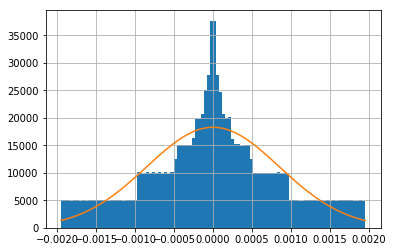

In [4]:
diff = B-A
mean = np.mean(diff)
stdev = np.sqrt(np.var(diff))
x = np.linspace(min(diff), max(diff), 100)
result = plt.hist(diff, 100)
plt.grid(True)
dx = result[1][1] - result[1][0]
scale = len(diff)*dx
plt.plot(x, spstats.norm.pdf(x, mean, stdev)*scale)
print("Mean:  {:.2E}".format(mean))
print("StDev: {:.2E}".format(stdev))

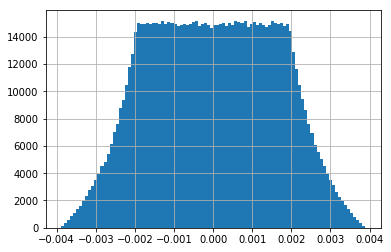

In [5]:
diff = (B-A)/abs(A)
plt.hist(diff, 100)
plt.grid(True)

In [47]:
def toFixed(val, nbits, round=True):
    fam = FXfamily(nbits)
    if round:
        if (val > 0):
            val = val + 2.0**(-1-nbits)
        if (val < 0):
            val = val - 2.0**(-1-nbits)
    x = FXnum(val, fam)
    return float(x)
rndFxP = np.vectorize(toFixed)
C = rndFxP(A, 7, round=True)

Mean:  -1.59E-06
StDev: 2.26E-03


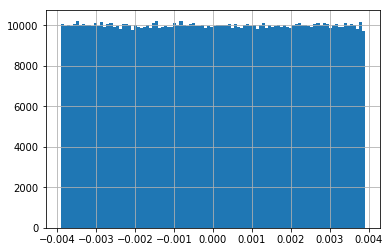

In [48]:
diff = C-A
mean = np.mean(diff)
stdev = np.sqrt(np.var(diff))
result = plt.hist(diff, 100)
plt.grid(True)
print("Mean:  {:.2E}".format(mean))
print("StDev: {:.2E}".format(stdev))

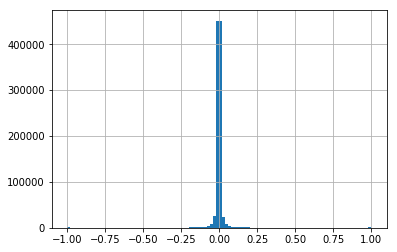

In [38]:
diff = (C-A)/abs(A)
plt.hist(diff, 100)
plt.grid(True)

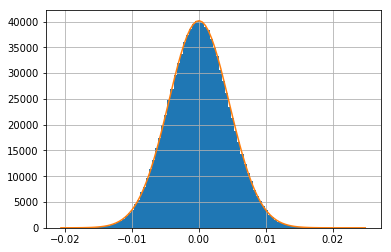

In [9]:
gauss = np.random.normal(mean, stdev, len(A))
x = np.linspace(min(gauss), max(gauss), 100)
result = plt.hist(gauss, 100)
plt.grid(True)
dx = result[1][1] - result[1][0]
scale = len(gauss)*dx
plt.plot(x, spstats.norm.pdf(x, mean, stdev)*scale)